In [1]:
import tensorflow as tf    # 导入Tensorflow
import numpy as np     # 导入numpy
import matplotlib.pyplot as plt # 导入matplotlib

# 在Jupyter中，使用matplotlib显示图像需要设置为 inline 模式，否则不会在网页里显示图像
%matplotlib inline

In [2]:
# 加载 MNIST 数据集
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [6]:
def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap = 'binary')
    plt.show()
#plot_image(train_images[4])

In [7]:
total_num = len(train_images)
valid_split = 0.2    # 验证集的比例占20%
train_num = int(total_num*(1-valid_split))    #训练集的数目

train_x = train_images[:train_num]    # 前部分给训练集
train_y = train_labels[:train_num]

valid_x = train_images[train_num:]   # 后20%给验证集
valid_y = train_labels[train_num:]

test_x = test_images
test_y = test_labels

In [8]:
print(valid_x.shape)

(12000, 28, 28)


In [9]:
train_x = train_x.reshape(-1,784)
valid_x = valid_x.reshape(-1,784)
test_x = test_x.reshape(-1,784)

In [10]:
train_x = tf.cast(train_x/255.0, tf.float32)
valid_x = tf.cast(valid_x/255.0, tf.float32)
test_x = tf.cast(test_x/255.0, tf.float32)

In [11]:
train_y = tf.one_hot(train_y, depth=10)
valid_y = tf.one_hot(valid_y, depth=10)
test_y = tf.one_hot(test_y, depth=10)

In [12]:
def model(x, w, b):
    pred = tf.matmul(x, w) + b
    return tf.nn.softmax(pred)

In [13]:
W = tf.Variable(tf.random.normal([784, 10],mean=0.0, stddev=1.0, dtype=tf.float32))
B = tf.Variable(tf.zeros([10]),dtype = tf.float32) 

In [14]:
def loss(x, y, w, b):
    pred = model(x, w, b) #  计算模型预测值和标签值的差异
    loss_ = tf.keras.losses.categorical_crossentropy(y_true=y, y_pred=pred)
    return tf.reduce_mean(loss_)  # 求均值，得出平均损失

In [15]:
training_epochs = 20 # 训练轮数
batch_size = 50  # 单次训练样本数（批次大小）
learning_rate= 0.001  # 学习率

In [16]:
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w, b])# 返回梯度向量

In [17]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [18]:
def accuracy(x, y, w, b):
    pred = model(x, w, b) #  计算模型预测值和标签值的差异
    # 检查预测类别tf.argmax(pred, 1)与实际类别tf.argmax(y, 1)的匹配情况
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 准确率，将布尔值转化为浮点数，并计算平均值
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

In [19]:
total_step= int(train_num/batch_size)  # 一轮训练有多少批次

loss_list_train = [] # 用于保存训练集loss值的列表
loss_list_valid = [] # 用于保存验证集loss值的列表
acc_list_train = [] # 用于保存训练集Acc值的列表
acc_list_valid = [] # 用于保存验证集Acc值的列表

for epoch in range (training_epochs):
    for step in range(total_step):
        xs = train_x[step*batch_size:(step+1)*batch_size]
        ys = train_y[step*batch_size:(step+1)*batch_size]
        xs = tf.reshape(xs,(-1,784))
        grads = grad(xs, ys, W, B)# 计算梯度
        optimizer.apply_gradients(zip(grads, [W,B])) # 优化器根据梯度自动调整变量w和b
    
    loss_train = loss(train_x, train_y, W, B).numpy()   # 计算当前轮训练损失
    loss_valid = loss(valid_x, valid_y, W, B).numpy()   # 计算当前轮验证损失
    acc_train = accuracy(train_x, train_y, W, B).numpy() 
    acc_valid = accuracy(valid_x, valid_y, W, B).numpy() 
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    acc_list_train.append(acc_train)
    acc_list_valid.append(acc_valid)
    print("epoch={:3d},train_loss={:.4f},train_acc={:.4f},val_loss={:.4f},val_acc={:.4f}".format(epoch+1, loss_train, acc_train,loss_valid, acc_valid))

epoch=  1,train_loss=1.7967,train_acc=0.6408,val_loss=1.7795,val_acc=0.6373
epoch=  2,train_loss=1.2797,train_acc=0.7175,val_loss=1.2734,val_acc=0.7141
epoch=  3,train_loss=1.0733,train_acc=0.7496,val_loss=1.0841,val_acc=0.7463
epoch=  4,train_loss=0.9576,train_acc=0.7684,val_loss=0.9798,val_acc=0.7645
epoch=  5,train_loss=0.8807,train_acc=0.7813,val_loss=0.9111,val_acc=0.7768
epoch=  6,train_loss=0.8250,train_acc=0.7908,val_loss=0.8621,val_acc=0.7858
epoch=  7,train_loss=0.7826,train_acc=0.7971,val_loss=0.8249,val_acc=0.7918
epoch=  8,train_loss=0.7492,train_acc=0.8034,val_loss=0.7961,val_acc=0.7949
epoch=  9,train_loss=0.7213,train_acc=0.8082,val_loss=0.7718,val_acc=0.7986
epoch= 10,train_loss=0.6979,train_acc=0.8127,val_loss=0.7512,val_acc=0.8018
epoch= 11,train_loss=0.6778,train_acc=0.8158,val_loss=0.7333,val_acc=0.8038
epoch= 12,train_loss=0.6602,train_acc=0.8194,val_loss=0.7175,val_acc=0.8065
epoch= 13,train_loss=0.6444,train_acc=0.8213,val_loss=0.7034,val_acc=0.8085
epoch= 14,tr

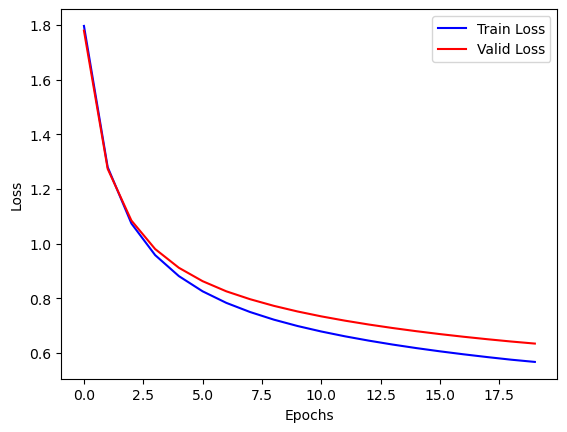

In [20]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train,'blue',label="Train Loss")
plt.plot(loss_list_valid,'red',label="Valid Loss")
plt.legend(loc=1)# 通过参数loc指定图例位置

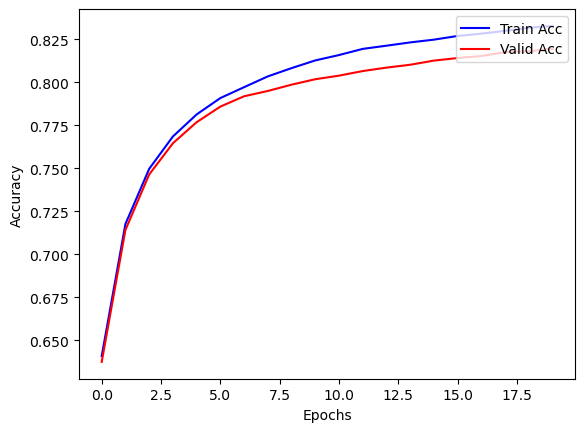

In [21]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(acc_list_train,'blue',label="Train Acc")
plt.plot(acc_list_valid,'red',label="Valid Acc")
plt.legend(loc=1)# 通过参数loc指定图例位置

In [22]:
acc_test = accuracy(test_x, test_y, W, B).numpy() 
print("Test accuracy:",acc_test)

Test accuracy: 0.8078


In [23]:
# 定义预测函数
def predit(x, y, w, b):
    pred = model(x, w, b) #  计算模型预测值和标签值的差异
    result = tf.argmax(pred, 1).numpy()
    return result

In [24]:
pred_test=predit(test_x, test_y, W, B)

In [25]:
pred_test[0]

9

In [26]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,      # 图像列表
                                  labels,      # 标签列表
                                  preds,  # 预测值列表
                                  index=0,       # 从第index个开始显示
                                  num=10 ):    # 缺省一次显示 10 幅
    fig = plt.gcf() # 获取当前图表，Get Current Figure
    fig.set_size_inches(10, 12)  # 1英寸等于 2.54 cm
    if num > 25: 
        num = 25            # 最多显示25个子图
    for i in range(0, num):
        ax = plt.subplot(5,5, i+1) # 获取当前要处理的子图
        
        ax.imshow(np.reshape(images[index],(28, 28)), cmap='binary') # 显示第index个图像                
            
        title = "label=" + str(labels[index])  # 构建该图上要显示的title信息
        if len(preds)>0:
            title += ",predict=" + str(preds[index]) 
            
        ax.set_title(title,fontsize=10)   # 显示图上的title信息
        ax.set_xticks([]);  # 不显示坐标轴
        ax.set_yticks([])        
        index = index + 1 
    plt.show()

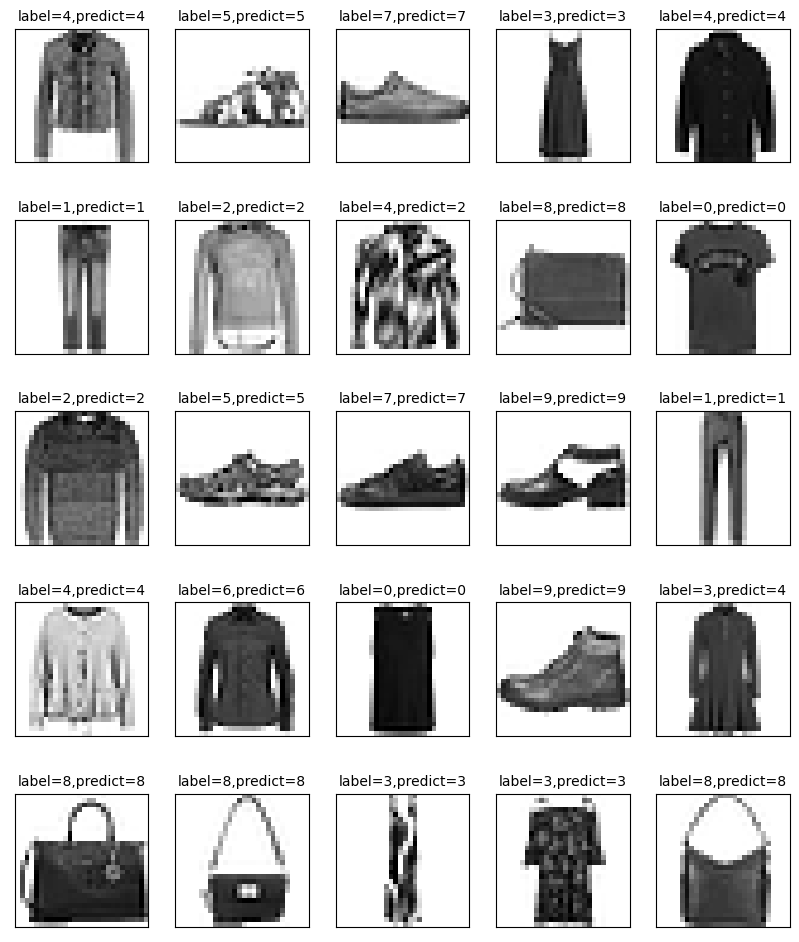

In [27]:
plot_images_labels_prediction(test_images, test_labels,pred_test,10,25)